# Introduction
## Aim

Identify gender of human using Scikit-Learn machine learning toolkit. 

## Task
   * Learn input-output function
   * Given a human as input predict its gender(output)

## Goal
   
   The problem of gender prediction is treated as a supervised learning problem. As it is a supervised learning problem so we need.
   * Labelled Data
   * High Quality Data
   * Large Amount of Data

# Input and Output
## Input

Human

    Represented as set of attributes(Height, Weight, Hair Length, Beard, Scarf)

## Output
Gender of Human

    Represented as Gender attribute(Male/Female)

## Goal

    Learn from input to predict Output

# Three Phases of Machine Learning
   * Training
   * Testing
   * Application

For this assignment we split these three phases into folowing steps.

## 1 Import Libraries

In [295]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
import pickle

## 2 Read, Understand and Pre-process Train/Test Data

### 2.2 Understand Data

In [2]:
train_data_list = []
with open("train.csv","r") as train_csv_file:
    csv_reader = csv.DictReader(train_csv_file)
    for data in csv_reader:
        train_data_dict = {
            "height":float(data['height']),"weight":int(data['weight']),
            "hair":data['hair'],"beard":data['beard'],
            "scarf":data['scarf'],"gender":data['gender']
        }
        train_data_list.append(train_data_dict)
train_csv_file.close()

train_df = pd.DataFrame(train_data_list, columns=["height","weight","hair","beard","scarf","gender"])
print("Train Dataset:")
train_df

Train Dataset:


,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [41]:
print("Train Dataset Columns:")
print(train_df.columns)

Train Dataset Columns:
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')


In [42]:
print("Number of instances in Train Dataset:")
print("Train instances:" , len(train_df))

Number of instances in Train Dataset:
Train instances: 6


In [4]:
test_data_list = []
with open("test.csv",'r') as test_csv_file:
    test_csv_reader = csv.DictReader(test_csv_file)
    for data in test_csv_reader:
        test_data_dict = {
            "height":float(data['height']),"weight":int(data['weight']),
            "hair":data['hair'],"beard":data['beard'],
            "scarf":data['scarf'],"gender":data['gender']
        }
        test_data_list.append(test_data_dict)
test_csv_file.close()    

test_df = pd.DataFrame(test_data_list, columns=["height","weight","hair","beard","scarf","gender"])
print("Test Dataset:")
test_df

Test Dataset:


,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [46]:
print("Test Dataset Columns:")
print(test_df.columns)

Test Dataset Columns:
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')


In [47]:
print("Number of instances in Test Dataset:")
print("Test instances in Test dataset" , len(test_df.index))

Number of instances in Test Dataset:
Test instances in Test dataset 4


In [79]:
print(len(train_df[train_df["gender"] == "Male"]),"Train instances having label 'Male':")
train_df[train_df["gender"] == "Male"]

3 Train instances having label 'Male':


,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
2,178.5000,200,Short,No,No,Male
4,175.2222,220,Short,Yes,No,Male


In [56]:
print(len(train_df[train_df['gender'] == 'Female']) , "Train instances having label 'Female':")
train_df[train_df['gender'] == 'Female']

3 Train instances having label 'Female':


,height,weight,hair,beard,scarf,gender
1,170.0,120,Long,No,No,Female
3,163.4,110,Medium,No,Yes,Female
5,165.0,150,Medium,No,Yes,Female


In [58]:
print(len(test_df[test_df["gender"] == "Male"]) , "Test instances having label 'Male':")
test_df[test_df["gender"] == "Male"]

2 Test instances having label 'Male':


,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
2,177.8,160,Bald,No,No,Male


In [59]:
print(len(test_df[test_df['gender'] == 'Female']) , "Test instances having label 'Female':")
test_df[test_df['gender'] == 'Female']

2 Test instances having label 'Female':


,height,weight,hair,beard,scarf,gender
1,160.5,130,Short,No,No,Female
3,161.1,100,Medium,No,No,Female


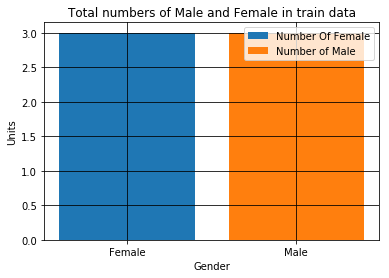

In [26]:
plt.bar(['Female'],[len(train_df[train_df['gender'] == 'Female'])], label="Number Of Female")
plt.bar(['Male'],[len(train_df[train_df['gender'] == 'Male'])], label= "Number of Male")

plt.title("Total numbers of Male and Female in train data")
plt.ylabel("Units")
plt.xlabel("Gender")
plt.grid(True,color="k")
plt.legend()
plt.show()

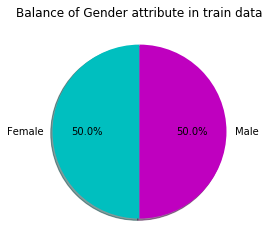

In [32]:
slices = [len(train_df[train_df['gender'] == 'Female']),
         len(train_df[train_df['gender'] == 'Male'])]
labelsOfSlices = ['Female','Male']
cols = ['c','m']
plt.pie(slices,
        labels=labelsOfSlices,
        colors=cols,
        startangle=90,
        shadow=True,
        explode=(0,0),
        autopct='%1.1f%%'
)
plt.title("Balance of Gender attribute in train data")
plt.show()

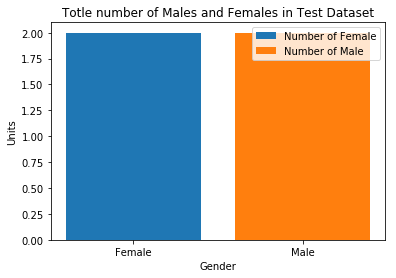

In [33]:
plt.bar('Female',
        len(test_df[test_df['gender'] == 'Female']),
        label='Number of Female')
plt.bar('Male',
       len(test_df[test_df['gender'] == 'Male']),
       label = 'Number of Male')
plt.title("Totle number of Males and Females in Test Dataset")
plt.xlabel('Gender')
plt.ylabel('Units')
plt.legend()
plt.show()

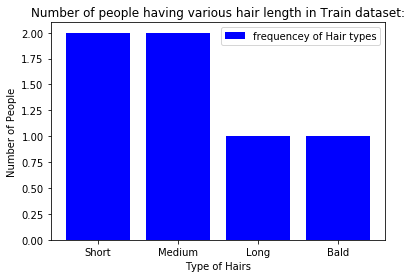

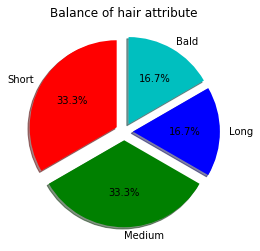

In [66]:

list_Of_Xlabels = ['Short','Medium','Long','Bald']
list_Of_Yvalues = [train_df.groupby('hair').size()['Short'],
                  train_df.groupby('hair').size()['Medium'],
                  train_df.groupby('hair').size()['Long'],
                  train_df.groupby('hair').size()['Bald']
                  ]
plt.bar(list_Of_Xlabels,
        list_Of_Yvalues,
        label='frequencey of Hair types',
        color='b'
        )
plt.title("Number of people having various hair length in Train dataset:")
plt.xlabel("Type of Hairs")
plt.ylabel("Number of People")
plt.legend()
plt.show()


cols = ['r','g','b','c']
plt.pie(list_Of_Yvalues,
        labels=list_Of_Xlabels,
        colors=cols,
        startangle=90,
        shadow=True,
        explode=(0.1,0.1,0.1,0.1),
        autopct='%1.1f%%'
)
plt.title("Balance of hair attribute")
plt.show()

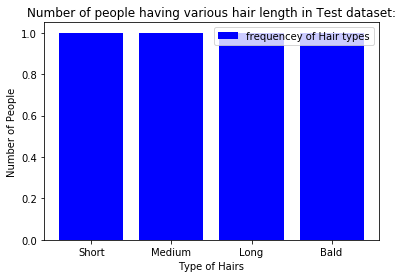

In [67]:
list_Of_Xlabels = ['Short','Medium','Long','Bald']
list_Of_Yvalues = [test_df.groupby('hair').size()['Short'],
                  test_df.groupby('hair').size()['Medium'],
                  test_df.groupby('hair').size()['Long'],
                  test_df.groupby('hair').size()['Bald']
                  ]
plt.bar(list_Of_Xlabels,
        list_Of_Yvalues,
        label='frequencey of Hair types',
        color='b'
        )
plt.title("Number of people having various hair length in Test dataset:")
plt.xlabel("Type of Hairs")
plt.ylabel("Number of People")
plt.legend()
plt.show()


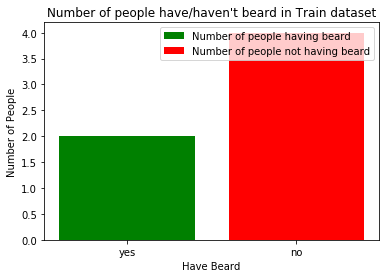

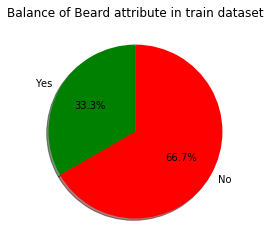

In [72]:
plt.bar('yes',
       train_df.groupby('beard').size()['Yes'],
       label='Number of people having beard',
       color='g')
plt.bar('no',
       train_df.groupby('beard').size()['No'],
       label='Number of people not having beard',
       color='r')
plt.legend()
plt.title("Number of people have/haven't beard in Train dataset")
plt.xlabel('Have Beard')
plt.ylabel('Number of People')
plt.show()

plt.pie([train_df.groupby('beard').size()['Yes'],
        train_df.groupby('beard').size()['No']
        ],
        labels=['Yes','No'],
        colors=['g','r'],
        startangle=90,
        shadow=True,
        explode=(0,0),
        autopct='%1.1f%%'
)
plt.title("Balance of Beard attribute in train dataset")
plt.show()

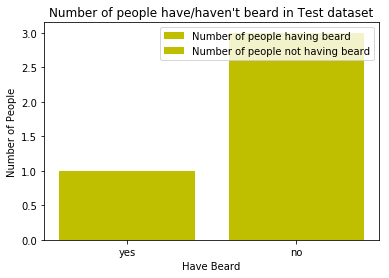

In [73]:
plt.bar('yes',
       test_df.groupby('beard').size()['Yes'],
       label='Number of people having beard',
       color='y')
plt.bar('no',
       test_df.groupby('beard').size()['No'],
       label='Number of people not having beard',
       color='y')
plt.legend()
plt.title("Number of people have/haven't beard in Test dataset")
plt.xlabel('Have Beard')
plt.ylabel('Number of People')
plt.show()

# Pre-Processing of Data

In [84]:
print("Train Dataset before pre-processing:")
train_df

Train Dataset before pre-processing:


,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [90]:
print("Train Dataset after pre-processing")
for i in range(0,len(train_df.index)):
    train_df['height'][i] = round(train_df['height'][i] , 2)
train_df

Train Dataset after pre-processing


c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,height,weight,hair,beard,scarf,gender
0,180.30,196,Bald,Yes,No,Male
1,170.00,120,Long,No,No,Female
2,178.50,200,Short,No,No,Male
3,163.40,110,Medium,No,Yes,Female
4,175.22,220,Short,Yes,No,Male
5,165.00,150,Medium,No,Yes,Female


In [116]:
gender_LebelEncoder = preprocessing.LabelEncoder()
gender_LebelEncoder.fit(["Male","Female"])
gender_LebelEncoder.classes_

array(['Female', 'Male'], dtype='<U6')

In [115]:
gender_LebelEncoder.transform(list(train_df["gender"]))

array([1, 0, 1, 0, 1, 0], dtype=int32)

In [117]:
scarf_LabelEncoder = preprocessing.LabelEncoder()
scarf_LabelEncoder.fit(["No","Yes"])
scarf_LabelEncoder.classes_

array(['No', 'Yes'], dtype='<U3')

In [118]:
beard_LabelEncoder = preprocessing.LabelEncoder()
beard_LabelEncoder.fit(["No","Yes"])
beard_LabelEncoder.classes_

array(['No', 'Yes'], dtype='<U3')

In [120]:
hair_LabelEncoder = preprocessing.LabelEncoder()
hair_LabelEncoder.fit(["Bald","Short","Medium","Long"])
hair_LabelEncoder.classes_

array(['Bald', 'Long', 'Medium', 'Short'], dtype='<U6')

In [122]:
print("Original Train Data:")
train_df

Original Train Data:


,height,weight,hair,beard,scarf,gender
0,180.30,196,Bald,Yes,No,Male
1,170.00,120,Long,No,No,Female
2,178.50,200,Short,No,No,Male
3,163.40,110,Medium,No,Yes,Female
4,175.22,220,Short,Yes,No,Male
5,165.00,150,Medium,No,Yes,Female


In [131]:
print("Train Data after Label Encoding:")
train_df_encoded = train_df
train_df_encoded["gender"] = gender_LebelEncoder.transform(train_df_encoded["gender"])
train_df_encoded
train_df_encoded["scarf"] = scarf_LabelEncoder.transform(train_df_encoded["scarf"])
train_df_encoded
train_df_encoded["beard"] = beard_LabelEncoder.transform(train_df_encoded["beard"])
train_df_encoded
train_df_encoded["hair"] = hair_LabelEncoder.transform(train_df_encoded["hair"])
train_df_encoded

Train Data after Label Encoding:


,height,weight,hair,beard,scarf,gender
0,180.30,196,0,1,0,1
1,170.00,120,1,0,0,0
2,178.50,200,3,0,0,1
3,163.40,110,2,0,1,0
4,175.22,220,3,1,0,1
5,165.00,150,2,0,1,0


In [ ]:
print("Encoding test data")
test_df_encoded = test_df
test_df_encoded["gender"] = gender_LebelEncoder.transform(test_df_encoded["gender"])
test_df_encoded
test_df_encoded["scarf"] = scarf_LabelEncoder.transform(test_df_encoded["scarf"])
test_df_encoded
test_df_encoded["beard"] = beard_LabelEncoder.transform(test_df_encoded["beard"])
test_df_encoded
test_df_encoded["hair"] = hair_LabelEncoder.transform(test_df_encoded["hair"])

In [184]:
print("Test Data after encoded")
test_df_encoded

Test Data after encoded


,height,weight,hair,beard,scarf,gender
0,179.1,185,1,1,0,1
1,160.5,130,3,0,0,0
2,177.8,160,0,0,0,1
3,161.1,100,2,0,0,0


## Logistic Regression

In [186]:
logisticRegression = LogisticRegression()
logisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [188]:
X = train_df_encoded.drop('gender', axis=1)
X

,height,weight,hair,beard,scarf
0,180.30,196,0,1,0
1,170.00,120,1,0,0
2,178.50,200,3,0,0
3,163.40,110,2,0,1
4,175.22,220,3,1,0
5,165.00,150,2,0,1


In [189]:
y = train_df_encoded['gender']
y

0    1
1    0
2    1
3    0
4    1
5    0
Name: gender, dtype: int32

In [192]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [193]:
logisticRegression.score(X,y)

1.0

In [195]:
logReg_Predictions = logisticRegression.predict(test_df_encoded.drop('gender', axis=1))
logReg_Predictions

array([1, 0, 0, 0])

In [202]:
print('Prediction using Logistic Regression:')
df_after_LogRegPrediction = test_df
df_after_LogRegPrediction['predicted_gender'] = gender_LebelEncoder.inverse_transform(logReg_Predictions)
df_after_LogRegPrediction

Prediction using Logistic Regression:


,height,weight,hair,beard,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,100,Medium,No,No,Female,Female


In [264]:
print('Accuracy score :')
AC_LR = accuracy_score(test_df_encoded['gender'],logReg_Predictions,normalize=True)
AC_LR

Accuracy score :


0.75

## Randomforest Classifier

In [233]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [236]:
randomForestClassifier.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [237]:
randomForestClassifier.score(X,y)

1.0

In [239]:
randforest_prediction = randomForestClassifier.predict(test_df_encoded.drop('gender',axis=1))
randforest_prediction

array([1, 0, 0, 0])

In [246]:
print("After Prediction")
df_test_afterPredict_rfc = test_df_encoded.copy()
df_test_afterPredict_rfc 
df_test_afterPredict_rfc["gender"] = gender_LebelEncoder.inverse_transform(df_test_afterPredict_rfc["gender"])
df_test_afterPredict_rfc
df_test_afterPredict_rfc["scarf"] = scarf_LabelEncoder.inverse_transform(df_test_afterPredict_rfc["scarf"])
df_test_afterPredict_rfc
df_test_afterPredict_rfc["beard"] = beard_LabelEncoder.inverse_transform(df_test_afterPredict_rfc["beard"])
df_test_afterPredict_rfc
df_test_afterPredict_rfc["hair"] = hair_LabelEncoder.inverse_transform(df_test_afterPredict_rfc["hair"])
df_test_afterPredict_rfc
df_test_afterPredict_rfc['predicted_gender'] = gender_LebelEncoder.inverse_transform(randforest_prediction)
df_test_afterPredict_rfc

After Prediction


,height,weight,hair,beard,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,100,Medium,No,No,Female,Female


In [265]:
print('Accuracy score :')
AC_RF = accuracy_score(test_df_encoded['gender'],randforest_prediction,normalize=True)
AC_RF

Accuracy score :


0.75

In [251]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [252]:
linearSVC.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [253]:
linearSVC.score(X,y)

1.0

In [254]:
linearSVC_prediction = linearSVC.predict(test_df_encoded.drop('gender',axis=1))
linearSVC_prediction

array([1, 0, 0, 0])

In [255]:
print("After Prediction")
df_test_afterPredict_lSVC = test_df_encoded.copy()

df_test_afterPredict_lSVC["gender"] = gender_LebelEncoder.inverse_transform(df_test_afterPredict_lSVC["gender"])
df_test_afterPredict_lSVC["scarf"] = scarf_LabelEncoder.inverse_transform(df_test_afterPredict_lSVC["scarf"])
df_test_afterPredict_lSVC["beard"] = beard_LabelEncoder.inverse_transform(df_test_afterPredict_lSVC["beard"])
df_test_afterPredict_lSVC["hair"] = hair_LabelEncoder.inverse_transform(df_test_afterPredict_lSVC["hair"])
df_test_afterPredict_lSVC['predicted_gender'] = gender_LebelEncoder.inverse_transform(linearSVC_prediction)
df_test_afterPredict_lSVC

After Prediction


,height,weight,hair,beard,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,100,Medium,No,No,Female,Female


In [266]:
print('Accuracy score :')
AC_LSVC = accuracy_score(test_df_encoded['gender'],linearSVC_prediction,normalize=True)
AC_LSVC

Accuracy score :


0.75

In [258]:
bernoulliNB = BernoulliNB()
bernoulliNB

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [259]:
bernoulliNB.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [260]:
bernoulliNB_prediction = bernoulliNB.predict(test_df_encoded.drop('gender',axis=1))
bernoulliNB_prediction

array([1, 0, 1, 0])

In [261]:
print("After Prediction")
df_test_afterPredict_bernoulliNB = test_df_encoded.copy()

df_test_afterPredict_bernoulliNB["gender"] = gender_LebelEncoder.inverse_transform(df_test_afterPredict_bernoulliNB["gender"])
df_test_afterPredict_bernoulliNB["scarf"] = scarf_LabelEncoder.inverse_transform(df_test_afterPredict_bernoulliNB["scarf"])
df_test_afterPredict_bernoulliNB["beard"] = beard_LabelEncoder.inverse_transform(df_test_afterPredict_bernoulliNB["beard"])
df_test_afterPredict_bernoulliNB["hair"] = hair_LabelEncoder.inverse_transform(df_test_afterPredict_bernoulliNB["hair"])
df_test_afterPredict_bernoulliNB['predicted_gender'] = gender_LebelEncoder.inverse_transform(bernoulliNB_prediction)
df_test_afterPredict_bernoulliNB

After Prediction


,height,weight,hair,beard,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Male
3,161.1,100,Medium,No,No,Female,Female


In [267]:
print('Accuracy score :')
AC_BNB = accuracy_score(test_df_encoded['gender'],bernoulliNB_prediction,normalize=True)
AC_BNB

Accuracy score :


1.0

In [279]:
print("Detailed Performance of all the models")
AC_DF = pd.DataFrame(
    {"Model":['Logistic Regression',"RandomForesstClassifier","LinearSVC","BernoulliNB"]}, 
)
AC_DF['Accuracy'] = [ AC_LR,AC_RF,AC_LSVC,AC_BNB ]
AC_DF

Detailed Performance of all the models


,Model,Accuracy
0,Logistic Regression,0.75
1,RandomForesstClassifier,0.75
2,LinearSVC,0.75
3,BernoulliNB,1.00


In [280]:
print('Best Model')
print("BernoulliNB","Accuracy",str(AC_BNB))

Best Model
BernoulliNB Accuracy 1.0


# 3 Application Phase

In [281]:
print('Train Data')
train_df_encoded

Train Data


,height,weight,hair,beard,scarf,gender
0,180.30,196,0,1,0,1
1,170.00,120,1,0,0,0
2,178.50,200,3,0,0,1
3,163.40,110,2,0,1,0
4,175.22,220,3,1,0,1
5,165.00,150,2,0,1,0


In [282]:
print('Test Data')
test_df_encoded

Test Data


,height,weight,hair,beard,scarf,gender
0,179.1,185,1,1,0,1
1,160.5,130,3,0,0,0
2,177.8,160,0,0,0,1
3,161.1,100,2,0,0,0


In [290]:
print('Combine test and train Data')
all_df_frames  = [train_df_encoded,test_df_encoded]
all_combined_df = pd.concat(all_df_frames)
all_combined_df

Combine test and train Data


,height,weight,hair,beard,scarf,gender
0,180.30,196,0,1,0,1
1,170.00,120,1,0,0,0
2,178.50,200,3,0,0,1
3,163.40,110,2,0,1,0
4,175.22,220,3,1,0,1
5,165.00,150,2,0,1,0
0,179.10,185,1,1,0,1
1,160.50,130,3,0,0,0
2,177.80,160,0,0,0,1
3,161.10,100,2,0,0,0


## Train Best Model on All Data

In [293]:
X = all_combined_df.drop('gender',axis=1)
y = all_combined_df['gender']
bernoulliNB = BernoulliNB()
bernoulliNB

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [294]:
bernoulliNB.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

## Saving best model for future use

In [299]:
fileName = 'BestPredictionModel.sav'
pickle.dump(bernoulliNB,open(fileName,'wb'))

## Loading saved model

In [300]:
bestModel = pickle.load(open(fileName,'rb'))

## Making Prediction on unseen examples

In [305]:
height = input('Please enter your Height here (centimeter):')
weight = input('Please enter your Weight here(kg):')
hair = input('Please enter your hair Length here(Bald/Long/Short/Medium):')
beard = input("Do you have beard? (Yes/No):")
scarf = input("Do you wear Scarf? (Yes/No):")

Please enter your Height here (centimeter):170
Please enter your Weight here(kg):120
Please enter your hair Length here(Bald/Long/Short/Medium):Long
Do you have beard? (Yes/No):No
Do you wear Scarf? (Yes/No):No


In [312]:
unseen_list = [{
    "height":height,
    "weight":weight,
    "hair":hair,
    "beard":beard,
    "scarf":scarf
}]
unseen_df = pd.DataFrame(unseen_list, columns=['height','weight','hair','beard','scarf'])
unseen_df

,height,weight,hair,beard,scarf
0,170,120,Long,No,No


In [314]:
print('Encoded Unseen Input')
unseen_df_encoded = unseen_df.copy()
unseen_df_encoded["scarf"] = scarf_LabelEncoder.transform(unseen_df_encoded["scarf"])
unseen_df_encoded["beard"] = beard_LabelEncoder.transform(unseen_df_encoded["beard"])
unseen_df_encoded["hair"] = hair_LabelEncoder.transform(unseen_df_encoded["hair"])
unseen_df_encoded

Encoded Unseen Input


,height,weight,hair,beard,scarf
0,170,120,1,0,0


In [315]:
bestModel_prediction = bestModel.predict(unseen_df_encoded)
bestModel_prediction

array([0])

In [317]:
print('Prediction:',gender_LebelEncoder.inverse_transform(bestModel_prediction)[0])

Prediction: Female
